# Introduction To Dataset:

In this notebook, I have performed Exploratory Data Analysis and applied various Classification Models on Heart Disease Dataset available on Kaggle at [here](https://www.kaggle.com/ronitf/heart-disease-uci). The Dataset classifies if a person has a Heart Disease or not depending on various features. I have tried to apply various Classification Techniques to predict whether the person is suffering from Heart Disease or not.



# Importing Libraries and Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',100)
np.set_printoptions(suppress = True)

In [3]:
plt.style.use("seaborn-darkgrid")
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc60']
flatui = ["#3498db", "#e74c3c", "#9b59b6", "#34495e", "#2ecc71"]
pal = sns.color_palette("coolwarm", 20)

**Loading the Dataset**

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head(n = 5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The Dataset Contains following attributes:
* `age` : age in years
* `sex` : Male or Female (1 = male; 0 = female)
* `cp` : Type of chest pain 
* `trestbps` : Resting Blood Pressure (in mm Hg on admission to the hospital)
* `chol` : Serum Cholestoral in mg/dl
* `fbs` : Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)
* `restecg` : Resting Electrocardiographic Results
* `thalach` : Maximum Heart Rate achieved
* `exang` : Exercise Induced Angina (1 = yes; 0 = no)
* `oldpeak` : ST depression induced by exercise relative to rest
* `slope` : The slope of the peak exercise ST segment
* `ca` : Number of major vessels (0-3) colored by flourosopy
* `thal` : 3 = normal; 6 = fixed defect; 7 = reversable defect
* `target` : Have Disease or not (1 = yes; 0 = no) 

**Dimensions of the Dataset**

In [7]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 303
Number of Columns: 14


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Cleaning the Data

Firstly, we can see `thal` attribute takes three values (1 - 3), but in some rows, it has been assigned 0 value. 

In [9]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Dropping the rows in which `thal` has been assigned 0 value.

In [10]:
df = df[df["thal"] != 0]

Let us see the data type of each variable.

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Now, we convert the categorical variables into string Data type for ease of Analysis.

In [12]:
df["sex"] = df["sex"].replace([1, 0], ["Male", "Female"])
df["exang"] = df["exang"].replace([1, 0], ["Yes", "No"])
df["thal"] = df["thal"].replace([1, 2, 3], ["Normal", "Fixed Defect", "Reversible Defect"])
df["cp"] = df["cp"].astype(str)
df["fbs"] = df["fbs"].astype(str)
df["restecg"] = df["restecg"].astype(str)
df["ca"] = df["ca"].astype(str)
df["slope"] = df["slope"].astype(str)
df["target"] = df["target"].astype(str)

In [13]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

**Checking for missing data in the Dataset**

In [14]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

So, The Dataset does not contain any missing values.

Now, let us start with the Analysis of the given Dataset.

# Analysis
## Univariate Analysis

Univariate analysis is the simplest form of analyzing data. In this, we analyse each variable independently.

   ### Continuous Variables
   
   Looking at the data types of variables, we have following continuous variables:
   * `age`
   * `chol`
   * `oldpeak`
   * `thalach`
   * `trestbps`

We can visualize the continuous variable distribution using **Histograms, Kernel Density Estimate, Boxplots** etc.

Let us start with **Histograms**:

<Figure size 1080x720 with 0 Axes>

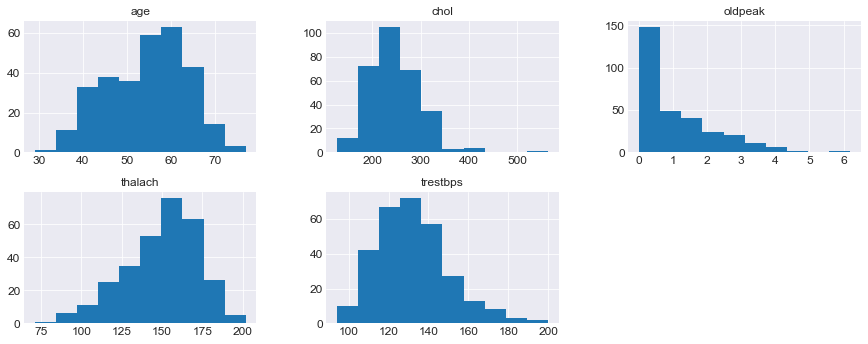

In [15]:
plt.figure(figsize = (15, 10))
df.hist(xlabelsize = 12, ylabelsize = 12, figsize = (15,15), layout = (5,3))
plt.show()

Now, we look at **Kernel Density Estimates (KDE)** :

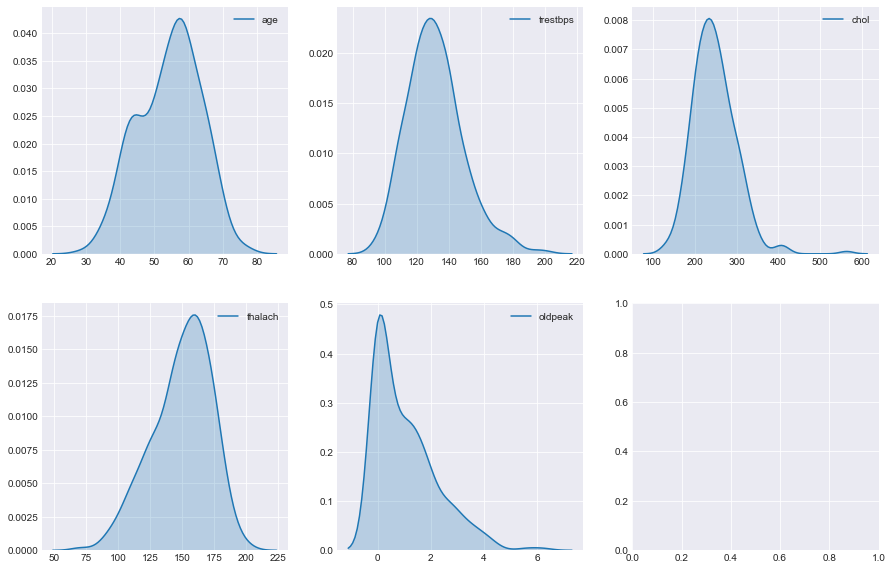

In [16]:
plt.subplots(nrows= 2, ncols= 3, figsize= (15, 10))
for i, col in enumerate(df.columns[df.dtypes != object]):  
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df[col], shade = True)
plt.show()

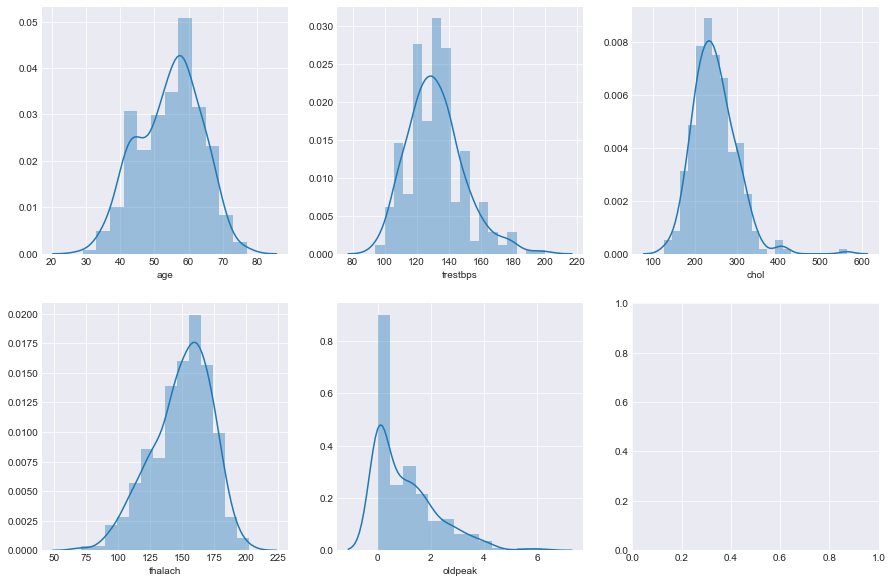

In [17]:
plt.subplots(nrows= 2, ncols= 3, figsize= (15, 10))
for i, col in enumerate(df.columns[df.dtypes != object]):  
    plt.subplot(2, 3, i+1)
    sns.distplot(df[col]);
plt.show()

We can get a better understanding of Outliers in Data looking at the **Boxplots**: 

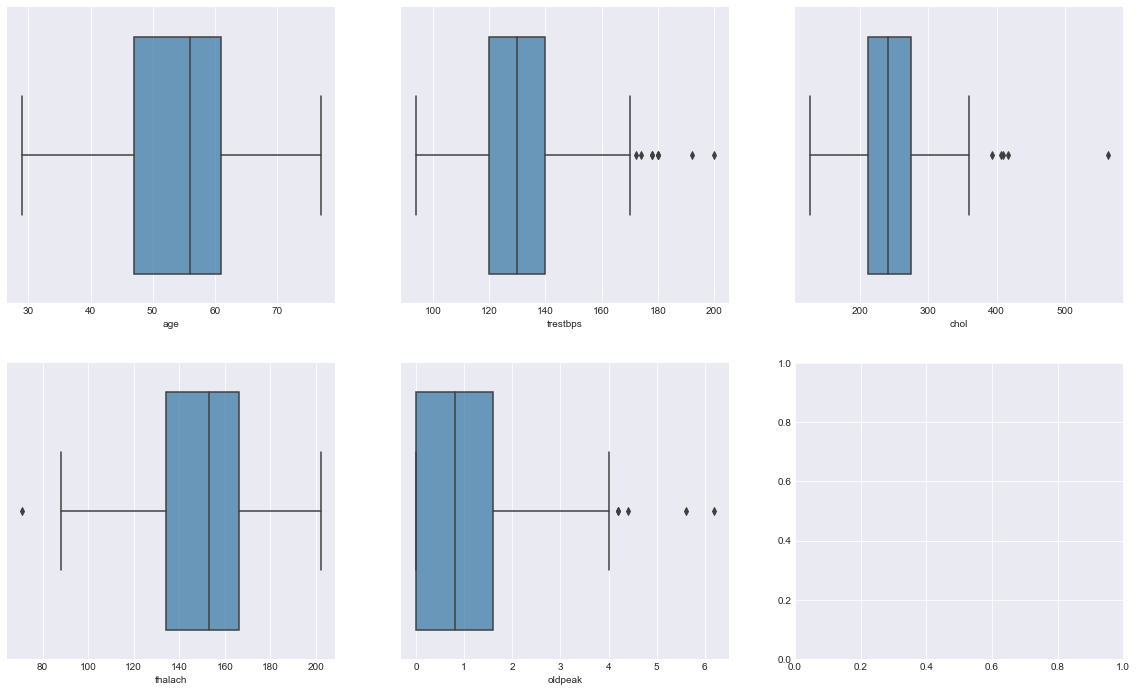

In [18]:
plt.subplots(nrows= 2, ncols= 3, figsize= (20, 12))
for i, col in enumerate(df.columns[df.dtypes != object]):  
    plt.subplot(2, 3, i+1)
    bx = sns.boxplot(x= col, data= df)
    for patch in bx.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .7))
plt.show()

We can see looking at the Boxplot of `chol`, it has some outliers. First, we remove them.

In [19]:
df = df[df["chol"] < 500]

Now, we should check whether `oldpeak` also has some outliers that need to be removed.

In [20]:
df.sort_values(by = "oldpeak", ascending = False).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,Female,0,160,164,0,0,145,No,6.2,0,3,Reversible Defect,0
221,55,Male,0,140,217,0,1,111,Yes,5.6,0,0,Reversible Defect,0
291,58,Male,0,114,318,0,2,140,No,4.4,0,3,Normal,0
101,59,Male,3,178,270,0,0,145,No,4.2,0,0,Reversible Defect,1
250,51,Male,0,140,298,0,1,122,Yes,4.2,1,3,Reversible Defect,0


Looking at the values of `oldpeak`, we can say values are within tolerable range.

### Discrete Variables

In the given Data, we have following discrete variables:
* `sex`
* `cp`
* `fbs`
* `restecg`
* `exang`
* `slope`
* `ca`
* `thal`
* `target`

In [21]:
df.describe(include="object")

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,300,300,300,300,300,300,300,300,300
unique,2,4,2,3,2,3,5,3,2
top,Male,0,0,1,No,2,0,Fixed Defect,1
freq,206,142,256,151,202,141,172,166,163


We can visualize discrete values using **Countplots** and **Pie-charts**.
Let us take a look at countplots of these variables.

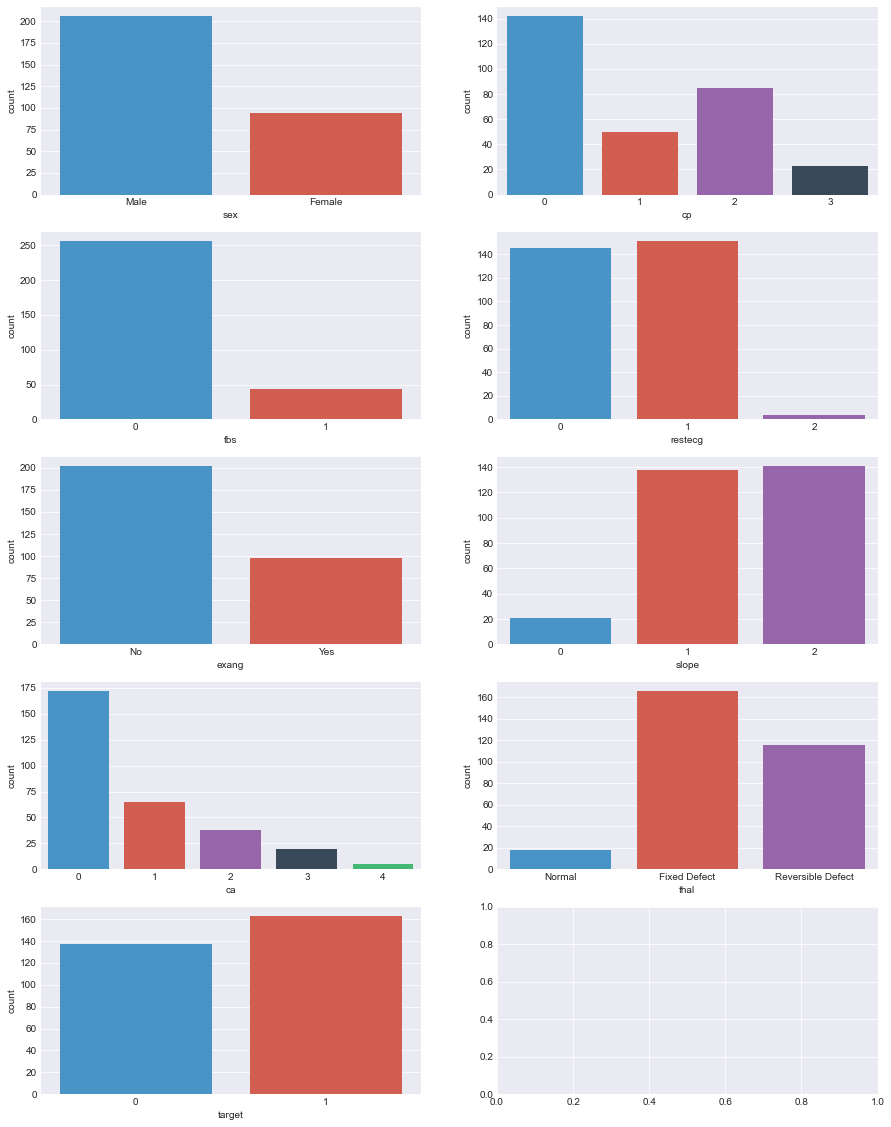

In [22]:
plt.subplots(nrows= 5, ncols= 2, figsize= (15, 20))
for i, col in enumerate(df.columns[df.dtypes == object]):  
    plt.subplot(5, 2, i+1)
    sns.countplot(x= col, data= df, palette = sns.color_palette(flatui))
plt.show()

There appears to be some outliers in `restecg`. We can find this out using `value_counts()`.

In [23]:
df.restecg.value_counts()

1    151
0    145
2      4
Name: restecg, dtype: int64

In [24]:
df = df[df["restecg"] != "2"]

Plotting the **Pie-charts** of these variables:

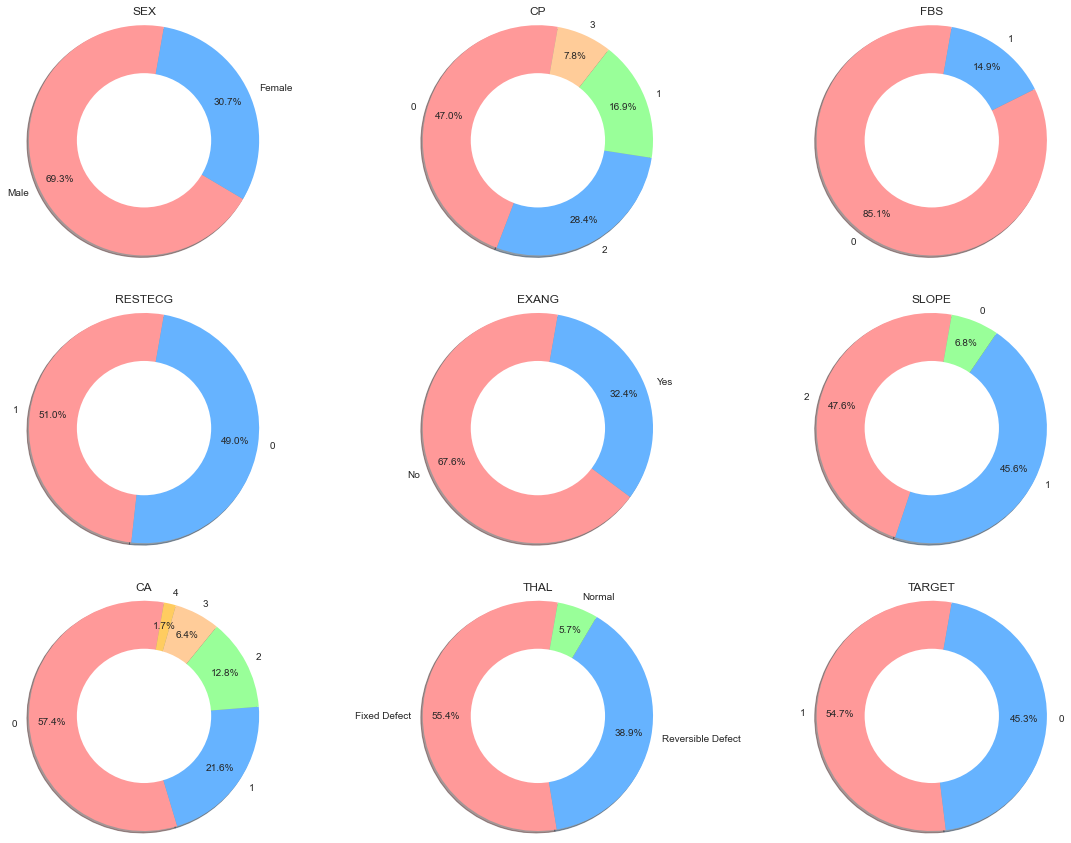

In [25]:
plt.subplots(nrows= 3, ncols= 3, figsize= (20, 15))
for i, col in enumerate(df.columns[df.dtypes == object]):  
    plt.subplot(3, 3, i+1)
    col_unique = df[col].value_counts()
    plt.pie(x = col_unique, radius = 1.2, pctdistance=0.8, shadow = True, colors=colors, labels = col_unique.index, autopct='%1.1f%%', startangle=80)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(col.upper())
plt.show()

## Multivariate Analysis

Now, we start with some more variables and try to figure out their relative nature.

First of all, we plot countplots of all discrete variables with respect to `target`.

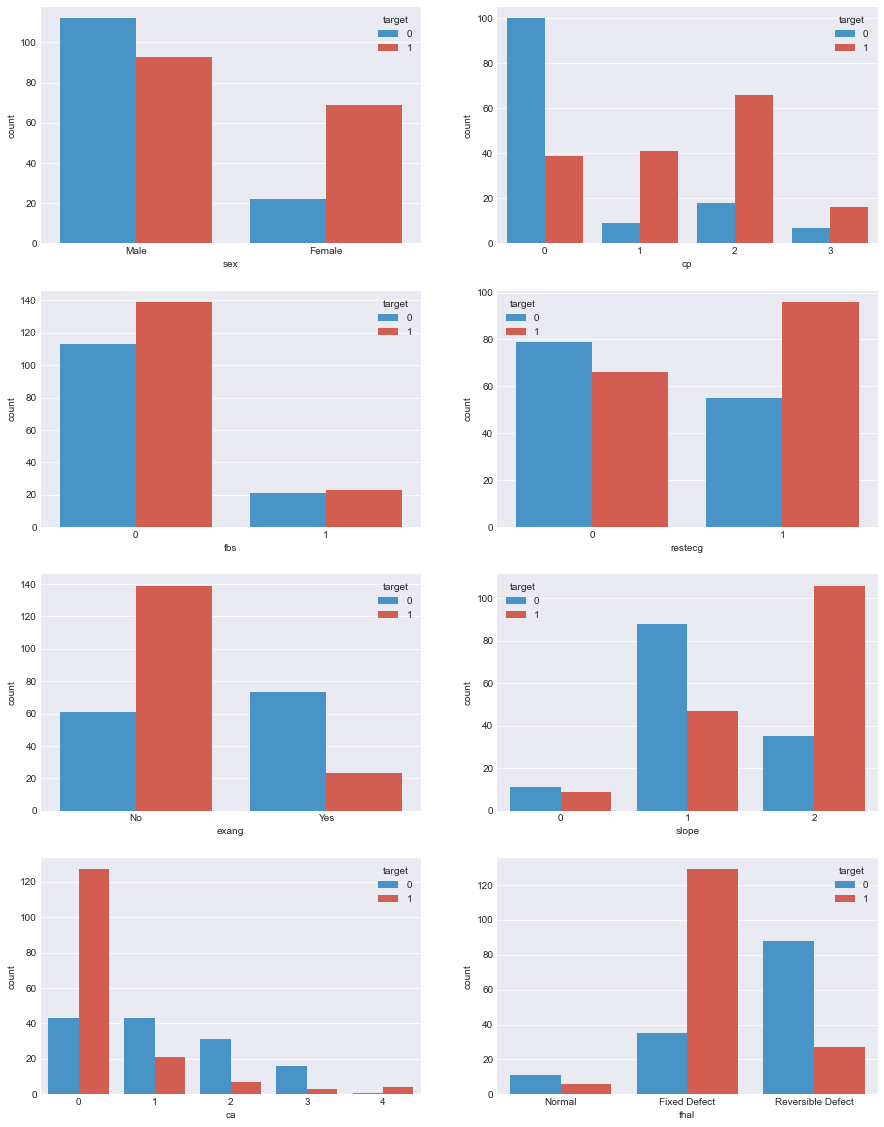

In [26]:
plt.subplots(nrows= 4, ncols= 2, figsize= (15, 20))
for i, col in enumerate(df.columns[df.dtypes == object]): 
    if col != "target":
        plt.subplot(4, 2, i+1)
        sns.countplot(x = col, hue = "target", data = df, palette = sns.color_palette(flatui))
plt.show()

By looking at these countplots, we can infer that:
* Females have a higher tendency of Heart Diseases as compared to males.
* Chest pain type "0" usually does not signify a Heart Disease whereas a person with Chest pain of type "2" has a higher chance of Heart Disease.
* People with slope "2" also have a higher chance of a Heart Disease.

Now, we plot violinplots of all continuous variables with respect to `target`.

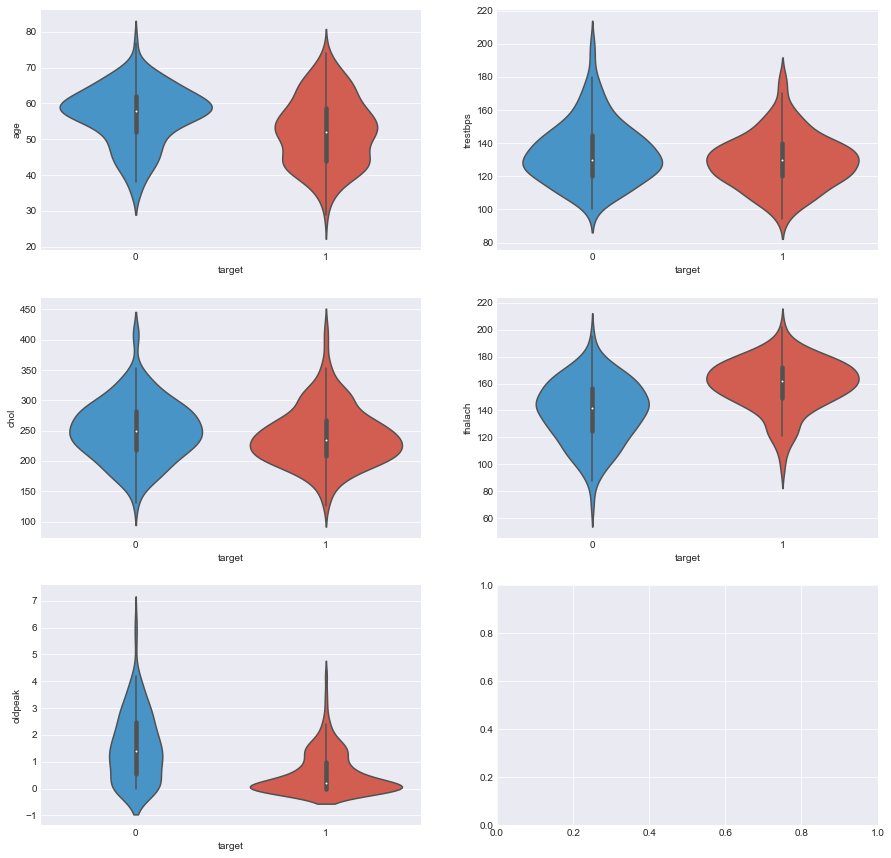

In [27]:
plt.subplots(nrows= 3, ncols= 2, figsize= (15, 15))
for i, col in enumerate(df.columns[df.dtypes != object]): 
    if col != "target":
        plt.subplot(3, 2, i+1)
        sns.violinplot(x = "target", y = col, data = df, palette = sns.color_palette(flatui))
plt.show()

We can see from these violinplots that people with Heart Disease have higher "thalach" in range of (160 - 180). "thalach" refers to the maximum heart rate achieved.

Let us look at the Distribution of `age` with respect to `target`.

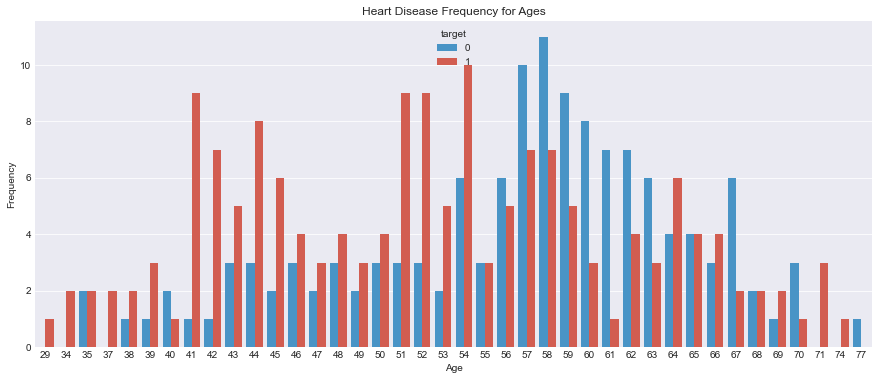

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target', palette = sns.color_palette(flatui))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here, we can see that people having age in the range (40 - 55) have highest risk of Heart Disease.

So, now we in for the exciting part i.e. building various classification models to get the predictions. But, first we need to prepare the Dataset.

# Classification Models

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,No,2.3,0,0,Normal,1
1,37,Male,2,130,250,0,1,187,No,3.5,0,0,Fixed Defect,1
2,41,Female,1,130,204,0,0,172,No,1.4,2,0,Fixed Defect,1
3,56,Male,1,120,236,0,1,178,No,0.8,2,0,Fixed Defect,1
4,57,Female,0,120,354,0,1,163,Yes,0.6,2,0,Fixed Defect,1


We need to convert the categorical variables into the integer Data type in order to carry out the classification process.

In [30]:
df["sex"] = df["sex"].replace(["Male", "Female"], [1, 0])
df["exang"] = df["exang"].replace(["Yes", "No"], [1, 0])
df["thal"] = df["thal"].replace(["Normal", "Fixed Defect", "Reversible Defect"], [1, 2, 3])
df["cp"] = df["cp"].astype(int)
df["fbs"] = df["fbs"].astype(int)
df["restecg"] = df["restecg"].astype(int)
df["exang"] = df["exang"].astype(int)
df["thal"] = df["thal"].astype(int)
df["ca"] = df["ca"].astype(int)
df["sex"] = df["sex"].astype(int)
df["target"] = df["target"].astype(int)

First, we get **Correlation Matrix** in order to find the features that are highly correlated to the `target`.

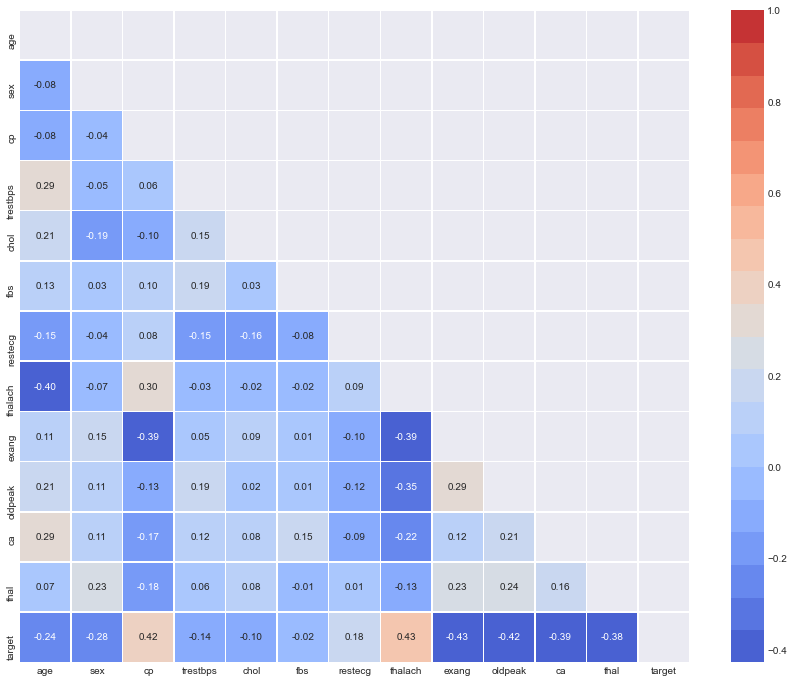

In [31]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap = pal, annot = True, fmt = ".2f", mask = mask, linewidths = 0.5)
plt.show()

We can drop features that are not highly correlated to `target`.

In [32]:
df.drop(corr["target"][corr["target"].between(-0.3, 0.3)].index.tolist(), axis= 1, inplace = True)

So, looking at the Correlation Matrix, we have dropped features that have correlation in the range (-0.3 - 0.3) with `target`.

In [33]:
df.head()

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1


Let us take a look at the new Correlation Matrix with remaining features.

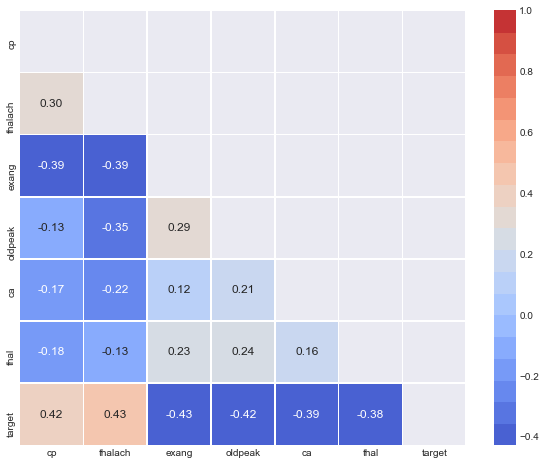

In [34]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = pal, annot = True, fmt = ".2f", mask = mask, annot_kws = {"size": 12}, linewidths = 0.5)
plt.show()

In order to build Classification models we need to prepare the Dataset. Since, the Dataset contains many categorical features we need to get **One Hot Encoded Format** of the following Dataset.

In [35]:
df["cp"] = df["cp"].astype(str)
df["exang"] = df["exang"].astype(str)
df["thal"] = df["thal"].astype(str)
df["ca"] = df["ca"].astype(str)
df["target"] = df["target"].astype(str)
df["slope"] = df["slope"].astype(str)

In [36]:
t_df = pd.get_dummies(df, drop_first= True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
t_df.head()

,thalach,oldpeak,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3,target_1
0,150,2.3,0,0,1,0,0,0,0,0,0,0,0,0,1
1,187,3.5,0,1,0,0,0,0,0,0,0,0,1,0,1
2,172,1.4,1,0,0,0,0,1,0,0,0,0,1,0,1
3,178,0.8,1,0,0,0,0,1,0,0,0,0,1,0,1
4,163,0.6,0,0,0,1,0,1,0,0,0,0,1,0,1


So, we now have Dataset in One Hot Encoded format. We need to apply feature scalling and split the Dataset into Training set and Test set to get started.

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = t_df.drop("target_1", axis= 1)
y = t_df["target_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 0)

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
t_x = sc_x.transform(X)
pal = sns.color_palette("coolwarm", 10)

The Dataset is now ready to build Classification Models. We will build following Models in this notebook:
* **Logistic Regression**
* **K-Nearest Neighbors (KNN)**
* **Gaussian Naive Bayes**
* **Support Vector Classifier**
* **Decision Tree**
* **Random Forest**
* **Model using Gradient Boosting**

We will also use `GridSearchCV` whenever required to perform Hyper Parameter Tuning in order to determine the optimal values for a given model.

## Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.


In [40]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(max_iter = 300, random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The model is ready now and we should check the accuracy on test set.

In [41]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_lr.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_lr.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.85
Confusion Matrix: 
[[43 13]
 [ 5 58]]


So, we have built our first model: Logistic Regression Model and it gives an **Accuracy** of **85%** on the test set.

Let us take a look at the **Confusion Matrix** of this model.

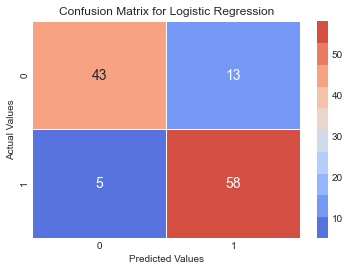

In [42]:
sns.heatmap(confusion_matrix(y_test, classifier_lr.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Also, **Receiver Operating Characteristic (ROC) Curve** can help us find out how good the model is for given Dataset.A Receiver Operating Characteristic (ROC) Curve is a way to compare diagnostic tests. It is a plot of the true positive rate against the false positive rate.

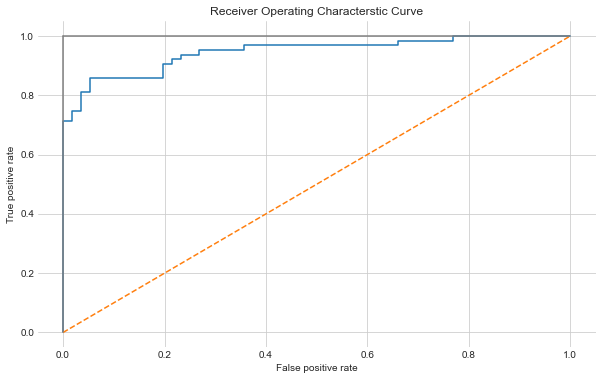

In [43]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_lr = classifier_lr.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_lr)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Area under the ROC curve gives an indication of model performance. A model is better fitted if it has higher area under the curve.

Let us find out the area for Logistic Regression.

In [44]:
area =[]
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_lr))
area.append(roc_auc_score(y_test,target_probailities_lr))

Area Under Curve: 0.9455782312925171


## KNearestNeighbors (KNN)

K-Nearest Neighbors (KNN) algorithm uses feature similarity to predict the values of new datapoints which means that the new data point will be assigned a value based on how closely it matches the points in the training set.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier_kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Here, we will use `GridSearchCV` to perform Hyper Parameter Tuning to get best results.

In [46]:
from sklearn.model_selection import GridSearchCV
parameters_kn = [{"n_neighbors": [1, 5, 10, 20, 50, 100], 'weights': ['uniform', 'distance']}]
grid_search_kn = GridSearchCV(estimator = classifier_kn, 
                           param_grid = parameters_kn,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)
grid_search_kn = grid_search_kn.fit(t_x, y)
best_accuracy_kn = grid_search_kn.best_score_
best_parameters_kn = grid_search_kn.best_params_
print(best_parameters_kn)

{'n_neighbors': 20, 'weights': 'uniform'}


In [47]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_kn.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_kn.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.87
Confusion Matrix: 
[[45 11]
 [ 5 58]]


So, we get an **Accuracy** of **87%** with KNN model.

**Confusion Matrix:**

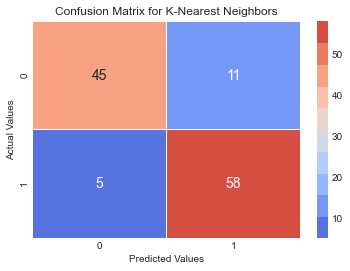

In [48]:
sns.heatmap(confusion_matrix(y_test, classifier_kn.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**ROC Curve:**

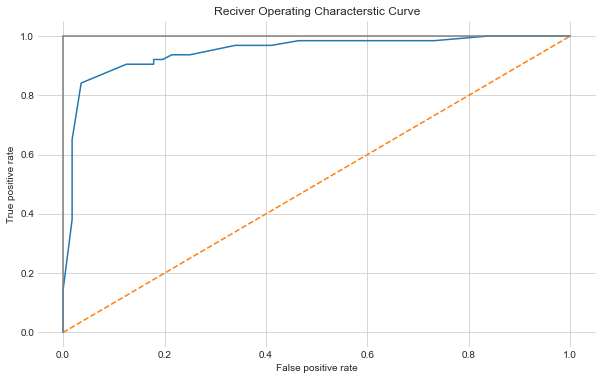

In [49]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_kn = classifier_kn.predict_proba(X_test)[:,1]
kn_false_positive_rate,kn_true_positive_rate,kn_threshold = roc_curve(y_test,
                                                             target_probailities_kn)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(kn_false_positive_rate,kn_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [50]:
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_kn))
area.append(roc_auc_score(y_test,target_probailities_kn))

Area Under Curve: 0.947987528344671


So, KNN model performs better than Logistic Regression model for this Dataset.

## Gaussian Naive Bayes

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. It is based upon the Bayes Theorem. Also, it is a probabilistic classifier.

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_nb.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_nb.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.85
Confusion Matrix: 
[[48  8]
 [10 53]]


Gasussian Naive Bayes gives us ***85% Accuracy**.

**Confusion Matrix:**

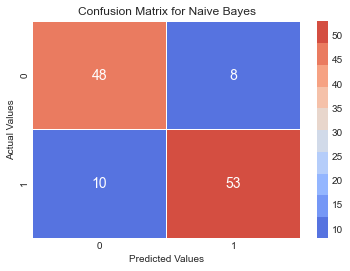

In [53]:
sns.heatmap(confusion_matrix(y_test, classifier_nb.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**ROC Curve:**

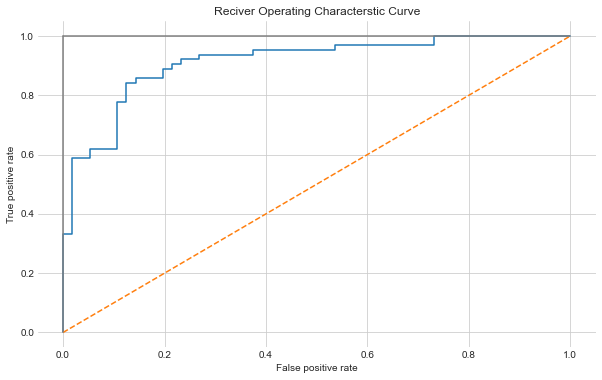

In [54]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_nb = classifier_nb.predict_proba(X_test)[:,1]
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,
                                                             target_probailities_nb)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(nb_false_positive_rate,nb_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [55]:
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_nb))
area.append(roc_auc_score(y_test,target_probailities_nb))

Area Under Curve: 0.911281179138322


## Support Vector Classifier

Support Vecor Classifier, given labeled training data (supervised learning), outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [56]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Support Vector Classifier has many useful parameters. We will apply Parameter Tuning to get the best results.

In [57]:
from sklearn.model_selection import GridSearchCV
parameters_svc = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'gamma': ['scale', 0.5, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': ['scale', 0.5, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': ['scale', 0.5, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]}]
grid_search_svc = GridSearchCV(estimator = classifier_svc, 
                           param_grid = parameters_svc,
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs = -1)
grid_search_svc = grid_search_svc.fit(t_x, y)
best_accuracy_svc = grid_search_svc.best_score_
best_parameters_svc = grid_search_svc.best_params_
print(best_parameters_svc)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [58]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_svc.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_svc.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.85
Confusion Matrix: 
[[43 13]
 [ 5 58]]


So, using SVC model **85% Accuracy** is obtained.

**Confusion Matrix:**

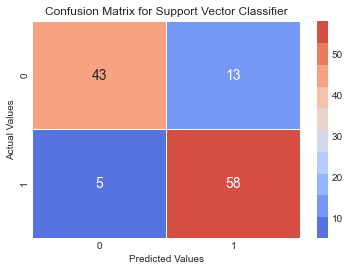

In [59]:
sns.heatmap(confusion_matrix(y_test, classifier_svc.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Support Vector Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Decision Tree

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner called recursive partitioning.

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt =  DecisionTreeClassifier(random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [61]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_dt.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_dt.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.80
Confusion Matrix: 
[[42 14]
 [10 53]]


So, We get an **Accuracy** of only **80%**, which kind of shows that Decision Tree Model is overfitting itself on Training Data.

**Confusion Matrix:**

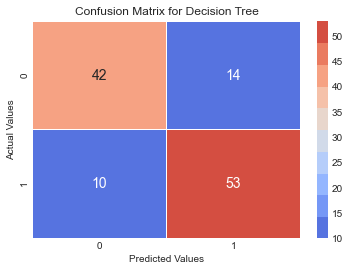

In [62]:
sns.heatmap(confusion_matrix(y_test, classifier_dt.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**ROC Curve:**

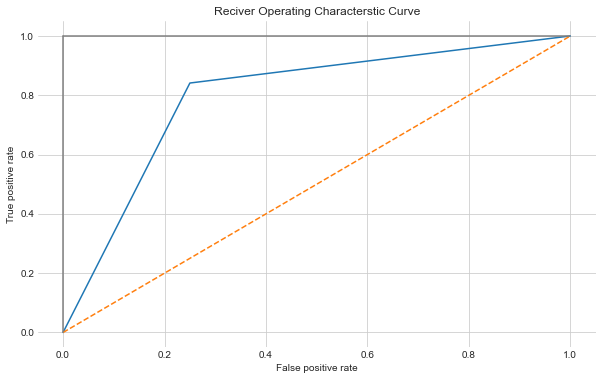

In [63]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_dt = classifier_dt.predict_proba(X_test)[:,1]
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,
                                                             target_probailities_dt)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(dt_false_positive_rate,dt_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [64]:
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_dt))
area.append(roc_auc_score(y_test,target_probailities_dt))

Area Under Curve: 0.7956349206349206


## Random Forest

Random Forest Classifier is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [66]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_rf.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_rf.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.81
Confusion Matrix: 
[[40 16]
 [ 7 56]]


We get an **Accuracy** of **81%**, so this model does not perform much better than Decision Tree Model for given Dataset.

**Confusion Matrix:**

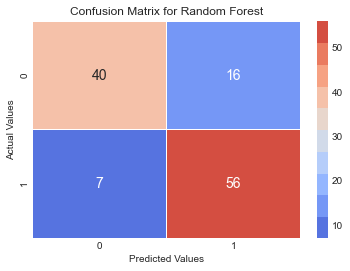

In [67]:
sns.heatmap(confusion_matrix(y_test, classifier_rf.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**ROC Curve:**

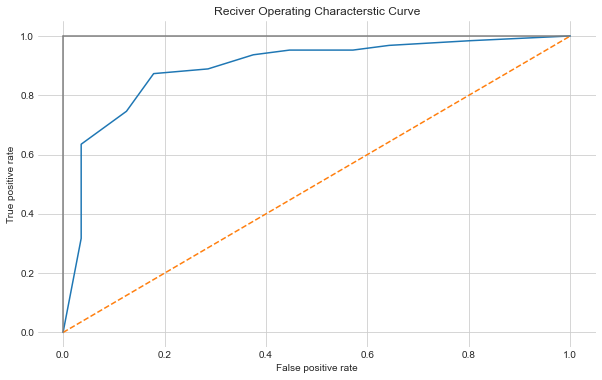

In [68]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_rf = classifier_rf.predict_proba(X_test)[:,1]
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,
                                                             target_probailities_rf)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [69]:
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_rf))
area.append(roc_auc_score(y_test,target_probailities_rf))

Area Under Curve: 0.8934240362811791


## Gradient Boosting

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. The Gradient Boosting Classifier depends on a loss function.

In [70]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(best_score = 0.1, booster = 'gblinear', gamma = 1, max_depth = 1, random_state = 0)
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, best_score=0.1, booster='gblinear',
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.5,
              max_delta_step=None, max_depth=1, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=0, num_parallel_tree=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=False,
              verbosity=None)

**Parameter Tuning:**

In [71]:
from sklearn.model_selection import GridSearchCV
parameters_xg = [{'booster': ['gbtree'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 100], 'base_score': [0.01, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'gamma': [1, 2, 3, 0.1, 0.01, 0.001]},
              {'booster': ['gblinear'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 100],'base_score': [0.01, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'gamma': [1, 2, 3, 0.1, 0.01, 0.001]},
              {'booster': ['dart'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 100],'base_score': [0.01, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'gamma': [1, 2, 3, 0.1, 0.01, 0.001]},
              {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 100], 'base_score': [0.01, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 'gamma': [1, 2, 3, 0.1, 0.01, 0.001]}]
grid_search_xg = GridSearchCV(estimator = classifier_xg, 
                           param_grid = parameters_xg,
                           scoring = 'accuracy', 
                           cv = 5,
                           n_jobs = -1)
grid_search_xg = grid_search_xg.fit(X_train, y_train)
best_accuracy_xg = grid_search_xg.best_score_
best_parameters_xg = grid_search_xg.best_params_
print(best_parameters_xg)

{'base_score': 0.1, 'booster': 'gblinear', 'gamma': 1, 'max_depth': 1}


In [72]:
print("Test Set:")
print("Accuracy = {:.2f}".format(accuracy_score(y_test, classifier_xg.predict(X_test))), "Confusion Matrix: ", confusion_matrix(y_test, classifier_xg.predict(X_test)), sep = "\n")

Test Set:
Accuracy = 0.85
Confusion Matrix: 
[[43 13]
 [ 5 58]]


So, we get an **Accuracy** of **85%**, which is certainly not bad considering other models.

**Confusion Matrix:**

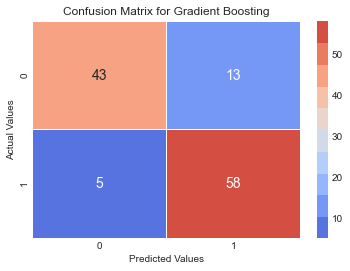

In [73]:
sns.heatmap(confusion_matrix(y_test, classifier_xg.predict(X_test)), annot= True, cmap= pal, fmt=".0f",annot_kws = {"size": 14}, linewidths = 0.5)
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**ROC Curve:**

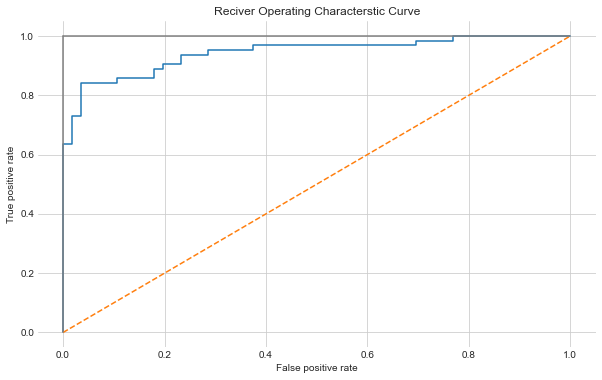

In [74]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
target_probailities_xg = classifier_xg.predict_proba(X_test)[:,1]
xg_false_positive_rate,xg_true_positive_rate,xg_threshold = roc_curve(y_test,
                                                             target_probailities_xg)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(xg_false_positive_rate,xg_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [75]:
print("Area Under Curve:", roc_auc_score(y_test,target_probailities_xg))
area.append(roc_auc_score(y_test,target_probailities_xg))

Area Under Curve: 0.9427437641723356


## Consolidated Results

Let us now look at all the models together and try to find the appropriate models for the given Dataset.

In [76]:
names = []
accur = []

In [77]:
models = {
    "log_reg" : LogisticRegression(max_iter = 300, random_state = 0),
    "knn" : KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2),
    "svc" :SVC(kernel = 'linear', random_state = 0),
    "n_bayes" : GaussianNB(),
    "dec_tree" : DecisionTreeClassifier(random_state = 0),
    "rf_10" : RandomForestClassifier(n_estimators = 10, random_state = 0),
    "xgboost": XGBClassifier(best_score = 0.1, booster = 'gblinear', gamma = 1, max_depth = 1, random_state = 0)
}

In [78]:
for name, model in models.items():
    names.append(str(name))
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accur.append((acc))
    cm = confusion_matrix(y_test, model.predict(X_test))

In [79]:
accur = [i for i in accur if i !=0]
accur = ['%.2f' % elem for elem in accur]
results = [(names[i], accur[i]) for i in range(0,7)]
results.sort(key = lambda x: x[1])

from tabulate import tabulate
print(tabulate(results, headers = ["Model", "Accuracy"]))

Model       Accuracy
--------  ----------
dec_tree        0.8
rf_10           0.81
log_reg         0.85
svc             0.85
n_bayes         0.85
xgboost         0.85
knn             0.87


So, we can see KNN model comes out to be the best fitted model whereas Decision Tree and Random Forest Classifier models struggles with the given Dataset.

This becomes much clear by looking at the Area Under ROC Curves:

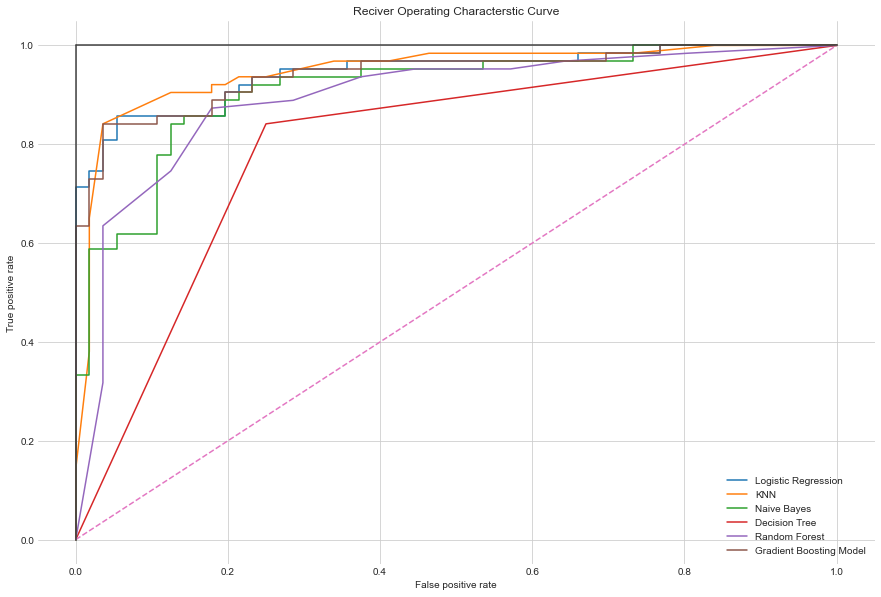

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate, label = 'Logistic Regression')
plt.plot(kn_false_positive_rate,kn_true_positive_rate, label = 'KNN')
plt.plot(nb_false_positive_rate,nb_true_positive_rate, label = 'Naive Bayes')
plt.plot(dt_false_positive_rate,dt_true_positive_rate, label = 'Decision Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate, label = 'Random Forest')
plt.plot(xg_false_positive_rate,xg_true_positive_rate, label = "Gradient Boosting Model")
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.25')
plt.plot([1,1],c='.25')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [81]:
Names = [i for i in names if i != 'svc']
area_curve = [(Names[i], area[i]) for i in range(0,6)]
area_curve.sort(key = lambda x: x[1])

In [82]:
print(tabulate(area_curve, headers = ["Model", "Area Under ROC Curve"]))

Model       Area Under ROC Curve
--------  ----------------------
dec_tree                0.795635
rf_10                   0.893424
n_bayes                 0.911281
xgboost                 0.942744
log_reg                 0.945578
knn                     0.947988


So, by looking at table above we can say KNN has highest Area under the curve whereas Decision Tree and Random Forest are at the other end of spectrum.